In [1]:
import sys
sys.path.append('../..')

import eeg_decoder
import numpy as np
from collections import OrderedDict
%load_ext autoreload
%autoreload 2

In [2]:
experiment_name = 'e'
data_dir = f'./data/{experiment_name}'
exp = eeg_decoder.Experiment(experiment_name,data_dir,dev=False,trim_timepoints=[-200,1500])

In [3]:
time_window = 25 
time_step = 25
trial_bin_size = 15 
n_splits = 100
group_dict = OrderedDict([('1 Motion',[21]),('2 Motions',[22])])
wrangl = eeg_decoder.Wrangler(exp.info['times'],time_window,time_step,trial_bin_size,n_splits,group_dict)
clfr = eeg_decoder.Classification(wrangl,exp.nsub)

In [4]:
for isub in range(exp.nsub):
    print(isub)
    xdata,ydata = exp.load_eeg(isub)
    xdata,ydata = wrangl.group_labels(xdata,ydata)
    for X_train_all, X_test_all, y_train, y_test in wrangl.bin_and_split_data(xdata,ydata):

        X_train_all, X_test_all, y_train, y_test = wrangl.balance_data(X_train_all, X_test_all, y_train, y_test)
        y_test_shuffle = np.random.permutation(y_test)

        for X_train, X_test in wrangl.roll_over_time(X_train_all, X_test_all):
            clfr.decode(X_train,X_test,y_train,y_test,y_test_shuffle,isub)


0
1
2
3
4
5
6
7
8


In [5]:
interp = eeg_decoder.Interpreter(clfr, subtitle='attended_feature') 
interp.save_results()

Significant timepoints: [ 136  160  208  232  280  328  352  376  400  424  448  472  496  520
  544  568  592  616  640  664  688  712  736  760  784  808  832  856
  880  904  928  952  976 1000 1024 1048 1072 1096 1120 1144 1168 1192
 1216 1240 1264 1288 1312 1336 1360 1384 1408 1432]
Saving output\figures\attended_featureacc.pdf
Saving output\figures\attended_featureacc.png
Mean delay accuracy: 0.674275462962963
Mean delay S.D.: 0.03444061662011684


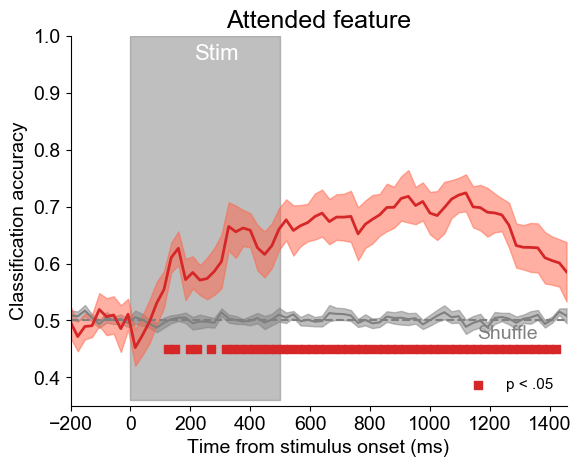

In [6]:
import matplotlib.pyplot as plt
interp.plot_acc(significance_testing=True,savefig=True,
                ylim=[0.35,1],chance_text_y=.22,
                title='Attended feature',stim_time=[0,500])
plt.show()

# Color

In [ ]:
time_window = 25 
time_step = 25
trial_bin_size = 15 
n_splits = 100
group_dict = OrderedDict([('1 Color',[11]),('2 Colors',[12])])
wrangl = eeg_decoder.Wrangler(exp.info['times'],time_window,time_step,trial_bin_size,n_splits,group_dict)
clfr = eeg_decoder.Classification(wrangl,exp.nsub)

In [ ]:
for isub in range(exp.nsub):
    print(isub)
    xdata,ydata = exp.load_eeg(isub)
    xdata,ydata = wrangl.group_labels(xdata,ydata)
    for X_train_all, X_test_all, y_train, y_test in wrangl.bin_and_split_data(xdata,ydata):

        X_train_all, X_test_all, y_train, y_test = wrangl.balance_data(X_train_all, X_test_all, y_train, y_test)
        y_test_shuffle = np.random.permutation(y_test)

        for X_train, X_test in wrangl.roll_over_time(X_train_all, X_test_all):
            clfr.decode(X_train,X_test,y_train,y_test,y_test_shuffle,isub)


0
1
2
3
4
5
6


In [ ]:
interp = eeg_decoder.Interpreter(clfr, subtitle='color') 
interp.save_results()

No handles with labels found to put in legend.


Mean delay accuracy: 0.7005799755799755
Mean delay S.D.: 0.046029539594033116


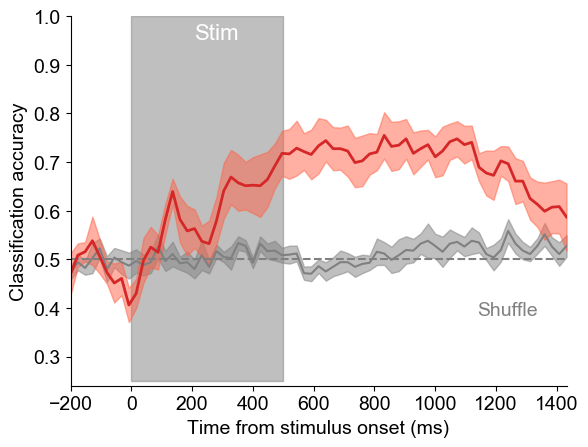

In [ ]:
import matplotlib.pyplot as plt
interp.plot_acc(significance_testing=False,savefig=False,ylim=[.24,1],chance_text_y=.23, title='',stim_time=[0,500])
plt.show()